AUDIO CLASSIFICATION DATA PREPROCESSING

In [2]:
## lets read a sampl audio using librosa
import librosa
audio_file_path = 'UrbanSound8K/dog_bark.wav'
librosa_audio_data,librosa_sample_rate = librosa.load(audio_file_path)


In [3]:
print(librosa_audio_data)

[-4.8021320e-10 -1.1641532e-10  1.4551915e-09 ...  1.0040304e-02
  9.4832648e-03  7.2818473e-03]


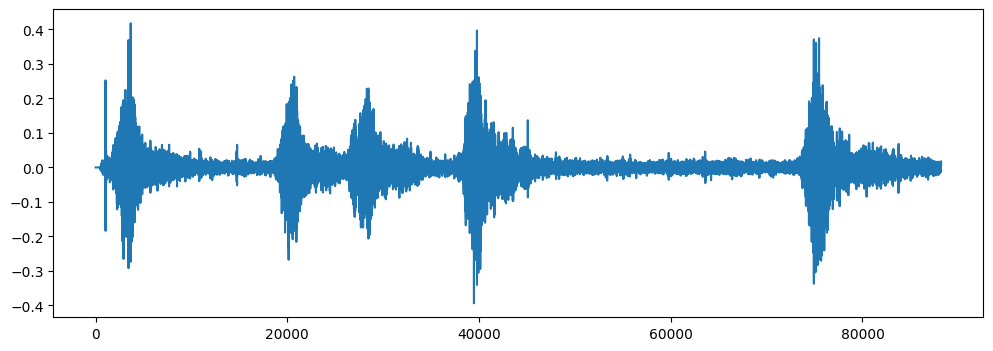

In [4]:
## lets plot the librosa audio data
import matplotlib.pyplot as plt
# original audio with 1 channel
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)


here the librosa convert the signal to mono,meaning the channel will always be 1

In [5]:
## lets try with scipy
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio = wav.read(audio_file_path)

In [6]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [ 292,  344],
       [ 116,  363],
       [-124,  308]], dtype=int16)

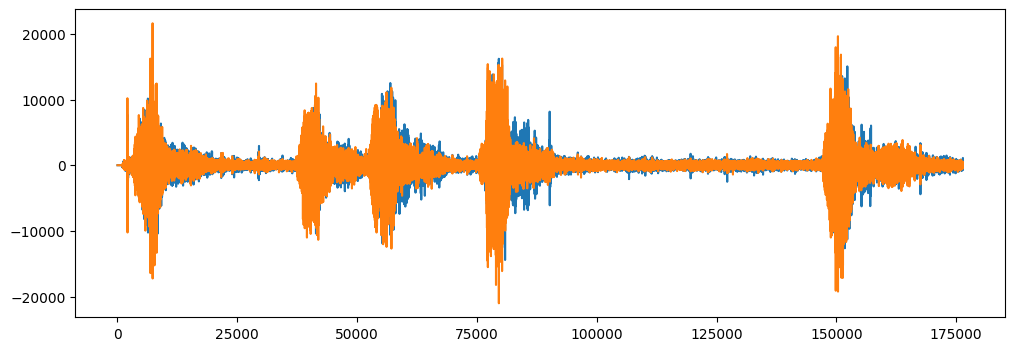

In [8]:
import matplotlib.pyplot as plt
# original audio with 2 channel(streo) scipy

plt.figure(figsize=(12,4))
plt.plot(wave_audio)


Extract Features

Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [9]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data,sr = librosa_sample_rate,n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [10]:
mfccs

array([[-4.9030640e+02, -2.4194421e+02, -1.7253937e+02, ...,
        -2.7200827e+02, -2.7552682e+02, -2.9714258e+02],
       [ 4.5929214e+01,  4.5850716e+01,  4.3127953e+01, ...,
         6.1014664e+01,  6.0649578e+01,  5.5911373e+01],
       [-1.5945866e+01, -2.0134014e+01, -2.0214417e+01, ...,
        -3.6452927e+01, -3.2573055e+01, -3.4206703e+01],
       ...,
       [-3.2008946e+00, -8.0508728e+00, -8.2866096e+00, ...,
         4.0148258e+00,  7.7903938e-01,  3.2815683e-01],
       [ 3.0650063e+00, -2.3604493e+00, -2.6079059e+00, ...,
        -3.6863508e+00, -3.7634754e+00, -1.8350457e+00],
       [-8.9975233e+00, -1.1360736e+00,  3.7220061e-01, ...,
        -1.4864199e+00, -1.1005019e+00, -1.5800612e+00]], dtype=float32)

In [11]:
## Extractimg mfcc's for every audio file
import pandas as pd
import librosa 
import os

audio_dataset_path = 'UrbanSound8K/audio/'
metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [12]:
def feature_extractor(file):
    audio,sample_rate = librosa.load(file_name,res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features


In [13]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=feature_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [03:10, 13.68it/s]C:\Users\ANKITA\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8323it [07:38, 24.88it/s]C:\Users\ANKITA\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8327it [07:38, 27.86it/s]C:\Users\ANKITA\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [07:59, 18.20it/s]


In [19]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


In [20]:
## split the dataset into dependent and independent features
X = np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [7]:
!pip install resampy


Defaulting to user installation because normal site-packages is not writeable


In [21]:
X.shape

(8732, 40)

In [22]:
### Label Encoding
y=np.array(pd.get_dummies(y))
### Label Encoder
# from tensorflow.keras.utils import to_categorical
# from sklearn.preprocessing import LabelEncoder
# labelencoder=LabelEncoder()
# y=to_categorical(labelencoder.fit_transform(y))

In [23]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665213e+00, -1.36902368e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305033e+00, -5.27745295e+00, -1.55697179e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920441e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641211e-01,  7.33490884e-01,  7.11009145e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155182e+01, ...,
         1.46811938e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066091e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651139e+00]], dtype=float32)

In [24]:
X_train.shape

(6985, 40)

In [26]:
X_test.shape

(1747, 40)

In [27]:
y

array([[False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])